<a href="https://colab.research.google.com/github/Taiba528/word-cloud/blob/master/Amazon_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import collections
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
from google.colab import files
uploaded=files.upload()

Saving Amazon Reviews with Ratings.csv to Amazon Reviews with Ratings.csv


In [4]:
df = pd.read_csv("Amazon Reviews with Ratings.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
Reviews         2000 non-null object
Star_Ratings    2000 non-null int64
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Explore Data


In [6]:
#Explore Data
df.shape
type(df)
df.size
df.shape
df.head()
df.tail()

(2000, 2)

pandas.core.frame.DataFrame

4000

(2000, 2)

,Reviews,Star_Ratings
0,Best Display in Market!,5
1,Awesome purchase,5
2,Picture Quality and Slow Motion Video Recordin...,2
3,Overpriced to the cheap quality,1
4,Unhappy with one plus,3


,Reviews,Star_Ratings
1995,waste of money,1
1996,"The smooth and seamless performance, immersive...",5
1997,Excellent phone,5
1998,Display problem,1
1999,Great mobile,5


In [7]:
df.Star_Ratings.value_counts()

5    1254
4     362
1     199
3     117
2      68
Name: Star_Ratings, dtype: int64

In [0]:
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

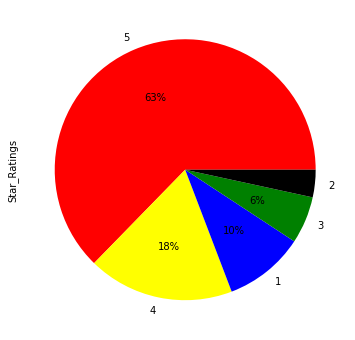

In [9]:
df.Star_Ratings.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow","blue","green","black"])

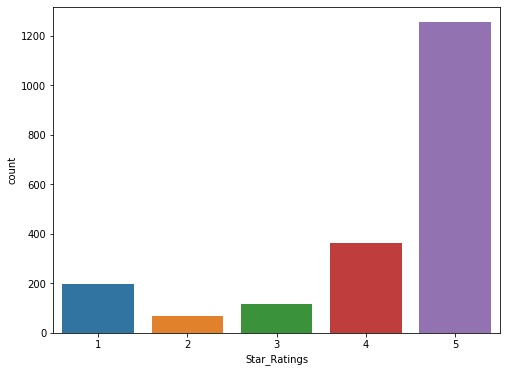

In [10]:
sns.countplot(x = 'Star_Ratings',data=df)

In [0]:
df_new= df.dropna(how = 'all')

In [12]:
df_new['Ratings_category'] = df_new['Star_Ratings'].apply(lambda Ratings: 'positive' if Ratings > 3 else 'negative')
df_new.head()

,Reviews,Star_Ratings,Ratings_category
0,Best Display in Market!,5,positive
1,Awesome purchase,5,positive
2,Picture Quality and Slow Motion Video Recordin...,2,negative
3,Overpriced to the cheap quality,1,negative
4,Unhappy with one plus,3,negative


In [13]:
word_list = []

max = len(df_new.Reviews)
for i in range (max):
  R1= df_new.Reviews[i]
  tokens = R1.split()
  #print(tokens)
  words = []
  
  for token in tokens:
    words.append(token.lower())
  word_list.append(words) 
print(len(word_list))
word_list[0:5]

2000


[['best', 'display', 'in', 'market!'],
 ['awesome', 'purchase'],
 ['picture',
  'quality',
  'and',
  'slow',
  'motion',
  'video',
  'recording',
  'blanking',
  'problem'],
 ['overpriced', 'to', 'the', 'cheap', 'quality'],
 ['unhappy', 'with', 'one', 'plus']]

In [22]:
from google.colab import files
uploaded=files.upload()

Saving AFINN-111.csv to AFINN-111 (1).csv


In [0]:
lex_file = open("AFINN-111.csv",encoding='cp1252')

In [0]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])


In [25]:
#For each word in text
#Get the word score (score is a number if the word is in Lexicon, 0 if not)
#Add all the scores and find the ploarity
sentiment_score = []
for text in word_list:
    score = 0
    for word in text:
        if word in (lexicons):
            score = int(score + lexicons[word])
    sentiment_score.append(score)
sentiment_score[5]

2

In [26]:
df_new['sentiment_score'] = sentiment_score
df_new.head()

,Reviews,Star_Ratings,Ratings_category,sentiment_score
0,Best Display in Market!,5,positive,3
1,Awesome purchase,5,positive,4
2,Picture Quality and Slow Motion Video Recordin...,2,negative,-2
3,Overpriced to the cheap quality,1,negative,0
4,Unhappy with one plus,3,negative,-2


In [27]:
df_new['Pred_Ratings_category'] = df_new['sentiment_score'].apply(lambda sentiment_score: 'positive' if sentiment_score > 0 else 'negative')
df_new.head(3)

,Reviews,Star_Ratings,Ratings_category,sentiment_score,Pred_Ratings_category
0,Best Display in Market!,5,positive,3,positive
1,Awesome purchase,5,positive,4,positive
2,Picture Quality and Slow Motion Video Recordin...,2,negative,-2,negative


In [28]:
df_1 = df_new[['Reviews','sentiment_score','Star_Ratings']]
df_1.head()

,Reviews,sentiment_score,Star_Ratings
0,Best Display in Market!,3,5
1,Awesome purchase,4,5
2,Picture Quality and Slow Motion Video Recordin...,-2,2
3,Overpriced to the cheap quality,0,1
4,Unhappy with one plus,-2,3


In [0]:
# Creating the Bag of Words model 
from sklearn.feature_extraction.text import CountVectorizer 

In [0]:
# To extract max 1500 feature. 
# "max_features" is attribute to 
# experiment with to get better results 
cv = CountVectorizer(max_features = 1500)  
  

In [32]:
x = df_1.iloc[:, 0]
x.head()

0                              Best Display in Market!
1                                     Awesome purchase
2    Picture Quality and Slow Motion Video Recordin...
3                      Overpriced to the cheap quality
4                                Unhappy with one plus
Name: Reviews, dtype: object

In [33]:
y = df_1.iloc[:, -1]
y.head()

0    5
1    5
2    2
3    1
4    3
Name: Star_Ratings, dtype: int64

In [0]:
X = cv.fit_transform(x).toarray()  

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [37]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(1800, 1421)

(200, 1421)

(1800,)

(200,)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  6   1   2   2   3]
 [  2   0   1   1   3]
 [  0   0   1   1   5]
 [  2   0   3   5  27]
 [  3   1   4  15 112]]
              precision    recall  f1-score   support

           1       0.46      0.43      0.44        14
           2       0.00      0.00      0.00         7
           3       0.09      0.14      0.11         7
           4       0.21      0.14      0.16        37
           5       0.75      0.83      0.79       135

    accuracy                           0.62       200
   macro avg       0.30      0.31      0.30       200
weighted avg       0.58      0.62      0.60       200



In [46]:
error = []

# Calculating error for K values between 1 and 5
for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(error)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

[0.38]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

[0.38, 0.465]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

[0.38, 0.465, 0.37]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

[0.38, 0.465, 0.37, 0.375]


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [48]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(1600, 1421)

(400, 1421)

(1600,)

(400,)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)


In [52]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 15   2   5   6   3]
 [  3   1   1   4   4]
 [  4   3   7   6   2]
 [  6   1  10  17  40]
 [ 16   2   9  58 175]]
              precision    recall  f1-score   support

           1       0.34      0.48      0.40        31
           2       0.11      0.08      0.09        13
           3       0.22      0.32      0.26        22
           4       0.19      0.23      0.21        74
           5       0.78      0.67      0.72       260

    accuracy                           0.54       400
   macro avg       0.33      0.36      0.34       400
weighted avg       0.58      0.54      0.56       400



In [53]:
error = []

# Calculating error for K values between 1 and 5
for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(error)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

[0.405]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

[0.405, 0.4625]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

[0.405, 0.4625, 0.395]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

[0.405, 0.4625, 0.395, 0.4275]


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [55]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(1400, 1421)

(600, 1421)

(1400,)

(600,)

In [57]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [59]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 22   1   4  16  19]
 [  8   2   3   3  11]
 [  7   1   2   7  19]
 [  8   3   6  26  55]
 [ 11   5   2  61 298]]
              precision    recall  f1-score   support

           1       0.39      0.35      0.37        62
           2       0.17      0.07      0.10        27
           3       0.12      0.06      0.08        36
           4       0.23      0.27      0.25        98
           5       0.74      0.79      0.77       377

    accuracy                           0.58       600
   macro avg       0.33      0.31      0.31       600
weighted avg       0.56      0.58      0.57       600



In [60]:
error = []

# Calculating error for K values between 1 and 5
for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(error)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

[0.42833333333333334]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

[0.42833333333333334, 0.47833333333333333]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

[0.42833333333333334, 0.47833333333333333, 0.4166666666666667]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

[0.42833333333333334, 0.47833333333333333, 0.4166666666666667, 0.44666666666666666]


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [66]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(1200, 1421)

(800, 1421)

(1200,)

(800,)

In [67]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [69]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 27   2   4   5  44]
 [  5   1   2   4  13]
 [  4   0   3   7  31]
 [  6   5   8   9 129]
 [  3  15   4  20 449]]
              precision    recall  f1-score   support

           1       0.60      0.33      0.43        82
           2       0.04      0.04      0.04        25
           3       0.14      0.07      0.09        45
           4       0.20      0.06      0.09       157
           5       0.67      0.91      0.78       491

    accuracy                           0.61       800
   macro avg       0.33      0.28      0.28       800
weighted avg       0.52      0.61      0.54       800



In [70]:
error = []

# Calculating error for K values between 1 and 5
for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(error)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

[0.41875]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

[0.41875, 0.4725]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

[0.41875, 0.4725, 0.3825]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

[0.41875, 0.4725, 0.3825, 0.3925]


In [71]:

# Fitting Random Forest Classification 
# to the Training set 
from sklearn.ensemble import RandomForestClassifier 
  
# n_estimators can be said as number of 
# trees, experiment with n_estimators 
# to get better results  
model = RandomForestClassifier(n_estimators = 501, 
                            criterion = 'entropy') 
                              
model.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# Predicting the Test set results 
y_pred = model.predict(X_test)  

In [74]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 33   3   7   2  37]
 [  7   0   6   1  11]
 [  3   0   9   6  27]
 [  9   2   4  11 131]
 [  7   0   3  23 458]]
              precision    recall  f1-score   support

           1       0.56      0.40      0.47        82
           2       0.00      0.00      0.00        25
           3       0.31      0.20      0.24        45
           4       0.26      0.07      0.11       157
           5       0.69      0.93      0.79       491

    accuracy                           0.64       800
   macro avg       0.36      0.32      0.32       800
weighted avg       0.55      0.64      0.57       800



In [0]:
corpus = [] #Create an empty corpus
ps = PorterStemmer() # For Stemming the words to original form
stop_words = set(stopwords.words('english')) # removes words like will, i, and, it etc
for i in range(1,2000):
  #removes handles (@), numbers, urls emojis and any other special charcters to have only text
  text_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", ' ',text[i])
  # Convert all words to lower case
  text_cln = text_cln.lower()
  # Split sentences in to words
  text_cln = text_cln.split()
  # Remove english stopwords
  text_cln = [x for x in text_cln if not x in stop_words]
  # Lemmatize words to the base form
  wn = nltk.WordNetLemmatizer()
  text_cln = [wn.lemmatize(x) for x in text_cln]
  # Join words to form the original sentence, but cleaned-up
  text_cln = " ".join(text_cln)
  #Append to the list to get all the tweets in one place
  corpus.append(text_cln)

In [0]:
#Clean Corpus
corpus[0:5]

In [0]:
#Strip the records and create a word list for each text
word_list = []
for record in (corpus):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)  
    
word_list 

In [0]:
print(word_list)

In [0]:
new_word_list = []
for word in word_list:
    if(word in words_remove):
        pass
else:
    new_word_list.append(word)
    print(new_word_list)


In [0]:
bagofwords = []
for i in range(1,1999):
  words = corpus[i].split()
  bagofwords.append(words)
  

In [0]:
bagofwords[0]

In [0]:
all_words = list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print('Most commonly occuring words and frequency\n')
words_freq = collections.Counter(all_words)
words_freq.most_common(20)

In [0]:
len(all_words)

In [0]:
print(all_words[0:10])

In [0]:
# Remove those words which are not contributing in analysis like star,phone,pro...
words_remove = ['star','phone','pro','one','oneplus','plus','review']
  

In [0]:
filtered_words = [] 
  
for w in all_words: 
    if w not in words_remove: 
        filtered_words.append(w) 
  
print(all_words) 
print(filtered_words) 

In [0]:
print('Most commonly occuring words and frequency\n')
words_freq = collections.Counter(all_words)
words_freq.most_common(20)

In [0]:
freq_word_df = pd.DataFrame(words_freq.most_common(15), columns=['Words','Freq'])
freq_word_df.head()

In [0]:
text = []
f_in = open("Amazon Reviews with Ratings.csv",'r')
for line in f_in.readlines():
    text.append(line)
f_in.close()

In [0]:
fig,ax = plt.subplots(figsize=(15,10))
freq_word_df.sort_values(by='Freq').plot.barh(x='Words', y = 'Freq', ax=ax, color = "CRIMSON")
plt.show()

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_string= " ".join(freq_word_df.Words)
wordcloud = WordCloud(#stopwords = STOPWORDS,
                          background_color='WHITE',
                      max_words=20
                         ).generate(word_string)

In [0]:
plt.figure(figsize=(15,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:
sentiment_text = [TextBlob(text) for text in corpus]
print(sentiment_text[5].polarity)
print(sentiment_text[5])

In [0]:
sentiments = [[text.sentiment.polarity, str(text)] for text in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns = ["Polarity", "text"])
sentiment_df.sort_values(by= 'Polarity', ascending=False)

In [0]:
fig, ax = plt.subplots(figsize=(15,10))
#Plot the histogram of the polarity values
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1], ax=ax, color = '#2B2CBA')
plt.title

In [0]:
from google.colab import files
uploaded=files.upload()

In [0]:
lex_file = open("AFINN-111.csv",encoding='cp1252')

In [0]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])


In [0]:
print(lexicons)

In [0]:
#For each word in text
#Get the word score (score is a number if the word is in Lexicon, 0 if not)
#Add all the scores and find the ploarity
affin_score = []
for text in word_list:
    score = 0
    for word in text:
        if word in (lexicons):
            score = score + lexicons[word]
    affin_score.append(score)
affin_score[5]

In [0]:
import pandas as pd
affin_df = pd.DataFrame(affin_score,corpus)
affin_df.head()


In [0]:
affin_df.groupby(affin_score).size()

In [0]:
fig, ax = plt.subplots(figsize=(15,10))
#Plot the histogram of the affin_score
affin_df.hist(bins=[-6,0,-0.5,-0.25,0.25,0.5,0.75,1], ax=ax, color = '#2B2CBA')
plt.title